In [18]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier


In [19]:
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
file_path = 'Youtube-Spam-Dataset.csv'  # Update this with your actual file path
data = pd.read_csv(file_path)


In [21]:
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = " ".join(word for word in text.split() if word not in STOPWORDS)  # Remove stopwords
    return text


In [22]:
data['clean_content'] = data['CONTENT'].apply(preprocess_text)


In [23]:
X = data['clean_content']
y = data['CLASS']

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X).toarray()

# Count Vectorizer for Term Frequency (TF only)
count_vectorizer = CountVectorizer(max_features=5000)
X_tf = count_vectorizer.fit_transform(X).toarray()


In [24]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_train_tf, X_test_tf = train_test_split(X_tf, test_size=0.2, random_state=42)


In [25]:
model_tf = Sequential()
model_tf.add(Dense(128, input_dim=X_train_tf.shape[1], activation='relu'))
model_tf.add(Dropout(0.3))
model_tf.add(Dense(64, activation='relu'))
model_tf.add(Dropout(0.3))
model_tf.add(Dense(1, activation='sigmoid'))

model_tf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the TF-only model
history_tf = model_tf.fit(X_train_tf, y_train, epochs=10, batch_size=64, validation_split=0.2)
loss_tf, accuracy_tf = model_tf.evaluate(X_test_tf, y_test)
print(f"TF Test Accuracy: {accuracy_tf}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6808 - loss: 0.6693 - val_accuracy: 0.8019 - val_loss: 0.5965
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8675 - loss: 0.5306 - val_accuracy: 0.8850 - val_loss: 0.4179
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9294 - loss: 0.3295 - val_accuracy: 0.9042 - val_loss: 0.2645
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9428 - loss: 0.1876 - val_accuracy: 0.9169 - val_loss: 0.2047
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9529 - loss: 0.1162 - val_accuracy: 0.9137 - val_loss: 0.1919
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9583 - loss: 0.0883 - val_accuracy: 0.9201 - val_loss: 0.1872
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9672 - loss: 0.0696 - val_accuracy: 0.9201 - val_loss: 0.1887
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9797 - loss: 0.0489 - val_accuracy: 0.9297 - val_loss: 0.

In [26]:
model_idf = Sequential()
model_idf.add(Dense(128, input_dim=X_train_tfidf.shape[1], activation='relu'))
model_idf.add(Dropout(0.3))
model_idf.add(Dense(64, activation='relu'))
model_idf.add(Dropout(0.3))
model_idf.add(Dense(1, activation='sigmoid'))

model_idf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the IDF model
history_idf = model_idf.fit(X_train_tfidf, y_train, epochs=10, batch_size=64, validation_split=0.2)
loss_idf, accuracy_idf = model_idf.evaluate(X_test_tfidf, y_test)
print(f"IDF Test Accuracy: {accuracy_idf}")



Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.5648 - loss: 0.6888 - val_accuracy: 0.8435 - val_loss: 0.6603
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8733 - loss: 0.6335 - val_accuracy: 0.8818 - val_loss: 0.5367
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9127 - loss: 0.4685 - val_accuracy: 0.8946 - val_loss: 0.3433
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9478 - loss: 0.2415 - val_accuracy: 0.9137 - val_loss: 0.2494
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9620 - loss: 0.1315 - val_accuracy: 0.9105 - val_loss: 0.2190
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9682 - loss: 0.0803 - val_accuracy: 0.9137 - val_loss: 0.2090
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9800 - loss: 0.0564 - val_accuracy: 0.9105 - val_loss: 0.2143
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9827 - loss: 0.0471 - val_accuracy: 0.9010 - v

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5830 - loss: 0.6870 - val_accuracy: 0.7029 - val_loss: 0.6582
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8148 - loss: 0.6256 - val_accuracy: 0.8307 - val_loss: 0.5311
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9268 - loss: 0.4430 - val_accuracy: 0.8850 - val_loss: 0.3429
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9449 - loss: 0.2396 - val_accuracy: 0.8850 - val_loss: 0.2571
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9588 - loss: 0.1350 - val_accuracy: 0.8946 - val_loss: 0.2228
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9726 - loss: 0.0827 - val_accuracy: 0.8946 - val_loss: 0.2145
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9759 - loss: 0.0642 - val_accuracy: 0.9010 - val_loss: 0.2127
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9832 - loss: 0.0480 - val_accuracy: 0.9042 - v

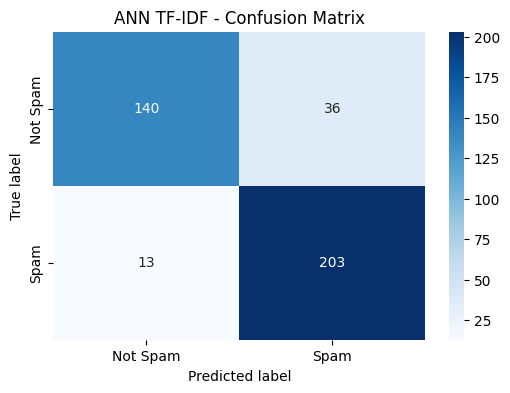


--- ANN TF-IDF Classification Report ---
              precision    recall  f1-score   support

    Not Spam       0.92      0.80      0.85       176
        Spam       0.85      0.94      0.89       216

    accuracy                           0.88       392
   macro avg       0.88      0.87      0.87       392
weighted avg       0.88      0.88      0.87       392

Combined TF and IDF Accuracy: 0.8852040767669678


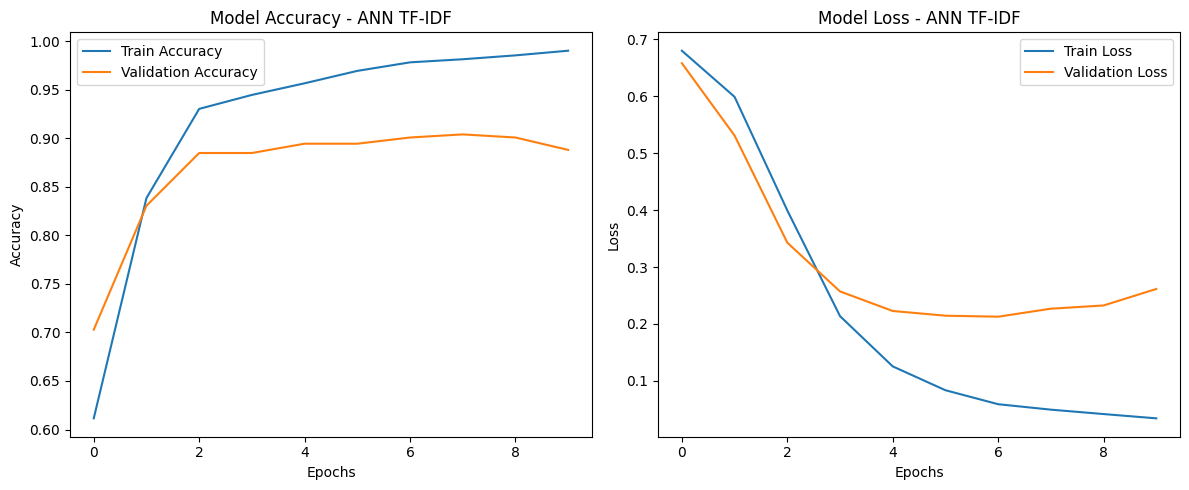

In [27]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

model_tfidf = Sequential()
model_tfidf.add(Dense(128, input_dim=X_train_tfidf.shape[1], activation='relu'))
model_tfidf.add(Dropout(0.3))
model_tfidf.add(Dense(64, activation='relu'))
model_tfidf.add(Dropout(0.3))
model_tfidf.add(Dense(1, activation='sigmoid'))

model_tfidf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the TF-IDF model
history_tfidf = model_tfidf.fit(X_train_tfidf, y_train, epochs=10, batch_size=64, validation_split=0.2)
loss_tfidf, accuracy_tfidf = model_tfidf.evaluate(X_test_tfidf, y_test)
print(f"TF-IDF Test Accuracy: {accuracy_tfidf}")

# Predictions for TF-IDF model
y_pred_ann_tfidf = (model_tfidf.predict(X_test_tfidf) > 0.5).astype("int32")

# Plot confusion matrix for TF-IDF model
plot_confusion_matrix(y_test, y_pred_ann_tfidf, "ANN TF-IDF")

# Classification report for TF-IDF model
print("\n--- ANN TF-IDF Classification Report ---")
print(classification_report(y_test, y_pred_ann_tfidf, target_names=['Not Spam', 'Spam']))

# Combined accuracy
combined_accuracy = (accuracy_tf + accuracy_idf) / 2
print(f"Combined TF and IDF Accuracy: {combined_accuracy}")

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_tfidf.history['accuracy'], label='Train Accuracy')
plt.plot(history_tfidf.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy - ANN TF-IDF')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_tfidf.history['loss'], label='Train Loss')
plt.plot(history_tfidf.history['val_loss'], label='Validation Loss')
plt.title('Model Loss - ANN TF-IDF')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:36:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Test Accuracy: 0.8903061224489796


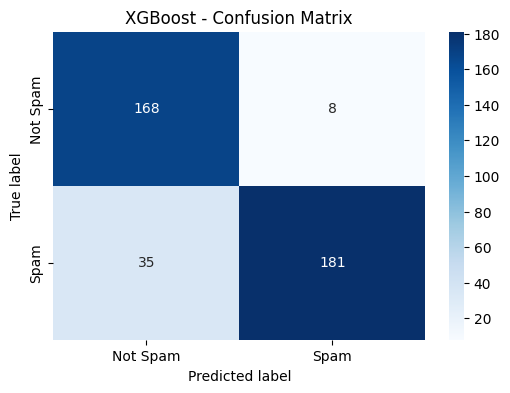

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       176
           1       0.96      0.84      0.89       216

    accuracy                           0.89       392
   macro avg       0.89      0.90      0.89       392
weighted avg       0.90      0.89      0.89       392



In [34]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_tfidf, y_train)
y_pred_xgb = xgb_model.predict(X_test_tfidf)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Test Accuracy: {accuracy_xgb}")
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Test Accuracy: 0.8673469387755102


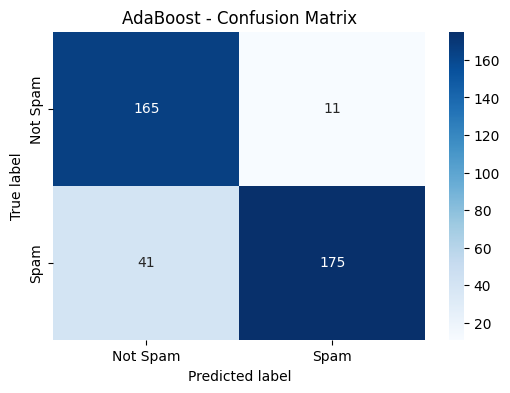


AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       176
           1       0.94      0.81      0.87       216

    accuracy                           0.87       392
   macro avg       0.87      0.87      0.87       392
weighted avg       0.88      0.87      0.87       392



In [37]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train_tfidf, y_train)
y_pred_ada = ada_model.predict(X_test_tfidf)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Test Accuracy: {accuracy_ada}")
plot_confusion_matrix(y_test, y_pred_ada, "AdaBoost")
print("\nAdaBoost Classification Report:")
print(classification_report(y_test, y_pred_ada))

Gradient Boosting Test Accuracy: 0.8698979591836735


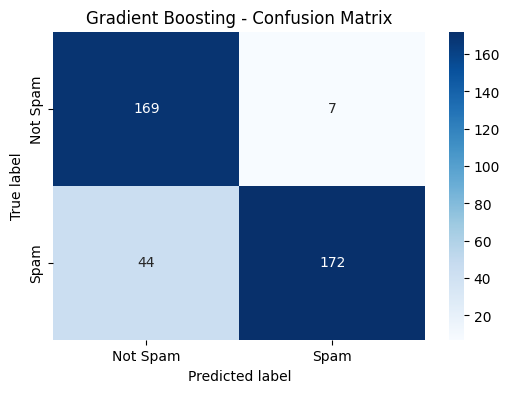


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       176
           1       0.96      0.80      0.87       216

    accuracy                           0.87       392
   macro avg       0.88      0.88      0.87       392
weighted avg       0.89      0.87      0.87       392



In [40]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_tfidf, y_train)
y_pred_gb = gb_model.predict(X_test_tfidf)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Test Accuracy: {accuracy_gb}")
plot_confusion_matrix(y_test, y_pred_gb, "Gradient Boosting")
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

<ipython-input-31-db49d1b5f424>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=model_accuracies, palette='viridis')


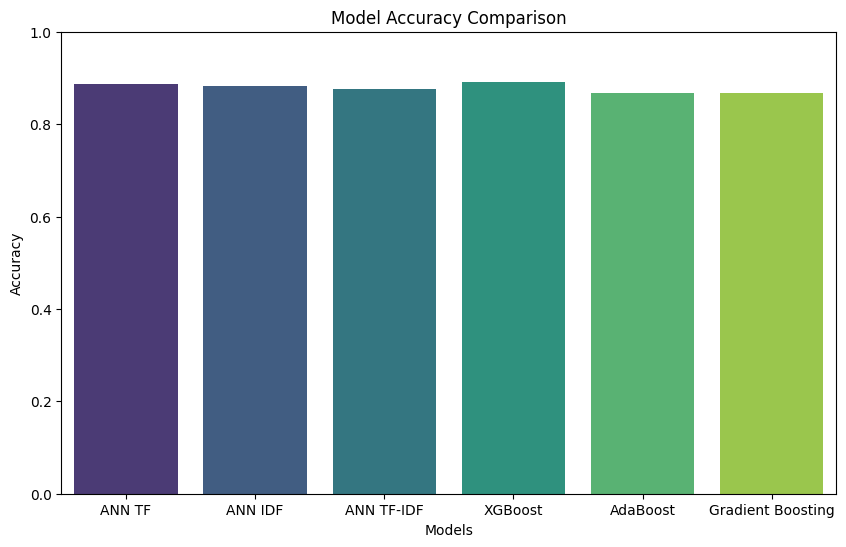

In [31]:
# Bar chart for model accuracies
model_names = ['ANN TF', 'ANN IDF', 'ANN TF-IDF', 'XGBoost', 'AdaBoost', 'Gradient Boosting']
model_accuracies = [accuracy_tf, accuracy_idf, accuracy_tfidf, accuracy_xgb, accuracy_ada, accuracy_gb]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=model_accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for better comparison
plt.show()


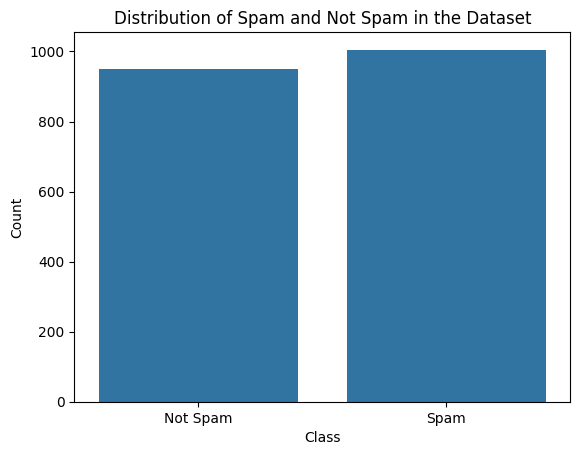

In [32]:
sns.countplot(x='CLASS', data=data)
plt.title('Distribution of Spam and Not Spam in the Dataset')
plt.xticks(ticks=[0, 1], labels=['Not Spam', 'Spam'])
plt.ylabel('Count')
plt.xlabel('Class')
plt.show()


In [33]:
data['Predicted'] = (model_tfidf.predict(X_tfidf) > 0.5).astype("int32")
data['Prediction_Label'] = data['Predicted'].map({0: 'Not Spam', 1: 'Spam'})

print("\n--- Comments with Predictions ---")
for index, row in data.iterrows():
    print(f"Comment: {row['CONTENT']}\nPrediction: {row['Prediction_Label']}\n")


Streaming output truncated to the last 5000 lines.
Comment: 2 billion views, only 2 million shares﻿
Prediction: Not Spam

Comment: Hi guys my name is Dylan and I do IRL football videos I have 1030  subscribers and I think you guys would like my content so come check it out  and if you do subscribe!﻿
Prediction: Spam

Comment: If I get 300 subscribers by tomorrow I'll do a epic Hunger Games Video! ﻿
Prediction: Spam

Comment: follower please https://www.facebook.com/lists/161620527267482﻿
Prediction: Spam

Comment: 2 billion views wow not even baby by justin beibs has that much he doesn't  deserve a capitalized name﻿
Prediction: Not Spam

Comment: If i reach 100 subscribers i will tazz my self and my friend﻿
Prediction: Spam

Comment: Please help me go to college guys! Thanks from the bottom of my heart.  https://www.indiegogo.com/projects/i-want-to-go-to-college--19/x/9082175﻿
Prediction: Spam

Comment: https://www.facebook.com/SchoolGeniusNITS/photos/ms.c.eJw9kVkOxDAMQm808h5z~;4sNjqP~